In [33]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.utils.np_utils import to_categorical
from keras.layers import MaxPool2D, AvgPool2D,Dense,Conv2D,Flatten,Activation,LSTM,Dropout,BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import Adam,rmsprop,SGD
from sklearn.metrics import classification_report,confusion_matrix
from keras import losses,metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [2]:
# downloading and importing the dataset from Keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
#checking shape of training data
x_train.shape


(50000, 32, 32, 3)

In [4]:
#checking shape of test data
x_test.shape

(10000, 32, 32, 3)

The data set contains 50000 number of 32 x 32 pixel images having 3 color channels as specified in the shape of a single instance tensor. Similarly test data has also the same shape with less number of images.

In [5]:
#checking response part of training and test sets
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

The shape looks good and even so we are good to go for the instance check

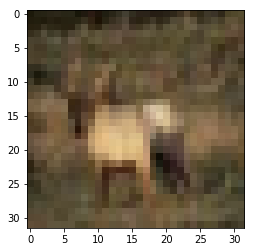

In [7]:
#lets view an image
plt.imshow(x_train[3],aspect='equal')

In [8]:
#lets view the classes and counts
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

The count is equal among all the classes so the algorithm will be able to learn all the classes equally.

In [9]:
#changing class variable to matrix of responses
y_train=to_categorical(y_train)

In [10]:
y_test=to_categorical(y_test)

In [11]:
#standardizing the data
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_test /= 255

We will use convolutional neural network architecture to classify these objects. Below is the model used where there are two convolutional layers with 32 filters of 3x3 shape followed by a max pooling layer of pool size 2x2.
Rectified linear unit has been used as the activation function here.
Flatten rate is used to further make a fully connected layer to finally output 10 categories.

In [12]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=[metrics.categorical_accuracy])

In [32]:
#summary of model is below
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [13]:
early=EarlyStopping(monitor='loss')

In [26]:
#fitting the model on the training set using batch size of 128, validation split of 0.3 and 3 epochs
h=model.fit(x_train,y_train,batch_size=128,validation_split=0.3,epochs=3,callbacks=[early])

Train on 35000 samples, validate on 15000 samples
Epoch 1/3
35000/35000 [==============================] - 128s 4ms/step - loss: 0.1140 - categorical_accuracy: 0.9606 - val_loss: 1.3487 - val_categorical_accuracy: 0.7158
Epoch 2/3
35000/35000 [==============================] - 140s 4ms/step - loss: 0.1059 - categorical_accuracy: 0.9633 - val_loss: 1.3924 - val_categorical_accuracy: 0.7186
Epoch 3/3
35000/35000 [==============================] - 144s 4ms/step - loss: 0.0782 - categorical_accuracy: 0.9731 - val_loss: 1.5756 - val_categorical_accuracy: 0.7215


We have obtained an accuracy of 71.24% on the test set which is almost equal to validation accuracy, this confirms that our model is not overfitting the data and generalizes well.

In [27]:
#evaluating on test set
model.evaluate(x_test,y_test,batch_size=128)

10000/10000 [==============================] - 10s 1ms/step


[1.6254026153564454, 0.7124]

Text(0.5,0,'Epochs')

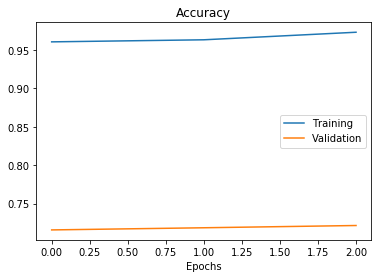

In [29]:
#plotting the training accuracy and validation accuracy along with epochs
plt.plot(h.history['categorical_accuracy'])
plt.plot(h.history['val_categorical_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [23]:
#getting classes back by converting from matrix form
y_test_classes = np.argmax(y_test,axis=1)

In [30]:
#predicting classes of test set using the model
y_pred = model.predict_classes(x_test)

In [34]:
#viewing metrics 
print(classification_report(y_test_classes,y_pred))
print(confusion_matrix(y_test_classes,y_pred))
print(accuracy_score(y_test_classes,y_pred))

             precision    recall  f1-score   support

          0       0.76      0.76      0.76      1000
          1       0.85      0.84      0.85      1000
          2       0.57      0.63      0.60      1000
          3       0.51      0.50      0.51      1000
          4       0.64      0.66      0.65      1000
          5       0.60      0.58      0.59      1000
          6       0.75      0.82      0.78      1000
          7       0.79      0.74      0.77      1000
          8       0.82      0.81      0.81      1000
          9       0.83      0.79      0.81      1000

avg / total       0.71      0.71      0.71     10000

[[761  18  67  11  22   6  13   8  64  30]
 [ 23 837  13  13   5  10  15   2  20  62]
 [ 53   4 628  70  85  61  59  20  11   9]
 [ 23   3  87 499  68 179  77  30  18  16]
 [ 20   3 104  68 658  33  40  63   7   4]
 [ 15   3  69 174  62 585  30  47   7   8]
 [  6   2  54  53  30  19 818   8   6   4]
 [ 12   3  35  51  71  59  12 743   4  10]
 [ 56  36  26  14

We have obtained a precision, recall and f1 score of 71% which is not too bad for a simple architecture of CNN.
There is still scope of improvement provided we have the desired computational power and memory.
But this model generalizes well on the whole data and gives an overview of how CNN is applied for object detection.